In [1]:
!pip install pmdarima --user

In [82]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import math

In [83]:
df = pd.read_csv('RELIANCE.NS.csv',parse_dates = ['Date'] )
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,36.747459,38.944569,36.747459,38.944569,29.869350,28802010.0
1,2000-01-04,39.981236,42.062302,38.882679,42.062302,32.260563,61320457.0
2,2000-01-05,39.710464,44.545658,39.710464,43.710136,33.524399,173426953.0
3,2000-01-06,44.715855,46.526150,44.715855,45.543640,34.930637,101355113.0
4,2000-01-07,45.644211,49.187443,45.334759,48.669109,37.327774,128426756.0


In [84]:
df = df.fillna(method = 'pad')

In [85]:
import matplotlib.pyplot as plt

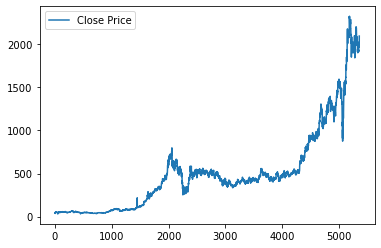

In [86]:
plt.figure()
plt.plot(df['Close'])
plt.legend(['Close Price'])

In [87]:
from statsmodels.tsa.stattools import adfuller

In [88]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [89]:
adfuller_test(df['Close'])

ADF Test Statistic : 1.1971957095670949
p-value : 0.9959664507917603
#Lags Used : 33
Number of Observations Used : 5324
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [90]:
df['first_closediff'] = df['Close'] - df['Close'].shift(1)

In [91]:
df = df.fillna(0)

In [92]:
adfuller_test(df['first_closediff'])

ADF Test Statistic : -11.690212093877594
p-value : 1.6596808908616589e-21
#Lags Used : 33
Number of Observations Used : 5324
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


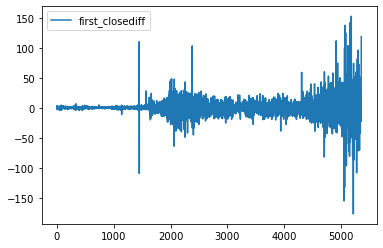

In [93]:
plt.figure()
plt.plot(df['first_closediff'])
plt.legend(['first_closediff'])

In [94]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

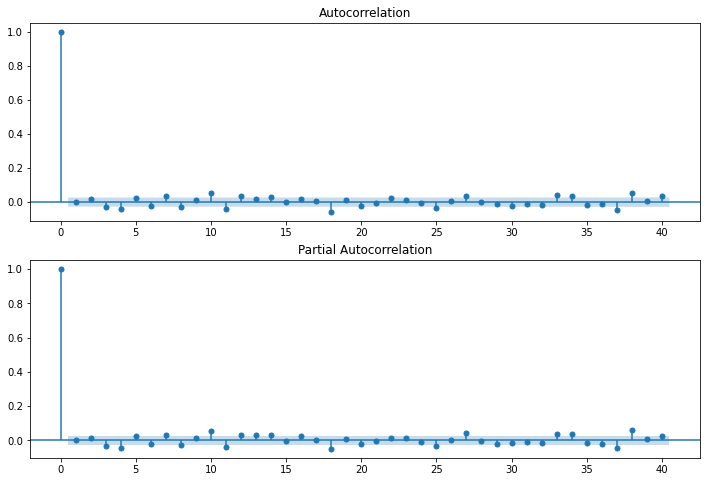

In [95]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['first_closediff'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['first_closediff'],lags=40,ax=ax2)

In [96]:
stepwise_fit = auto_arima(df['Close'], trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=43618.581, Time=4.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=43635.434, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=43637.417, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=43637.419, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=43637.344, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=43638.790, Time=1.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=43639.107, Time=3.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=43632.039, Time=2.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=43631.450, Time=3.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=43639.420, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=43631.942, Time=2.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=43632.257, Time=1.67 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.38 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=43620.421, Time=2.54 sec

Best model:  ARIMA(2,1,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5358
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -21803.290
Date:                Mon, 07 Jun 2021   AIC                          43618.581
Time:                        18:39:25   BIC                          43658.098
Sample:                             0   HQIC                         43632.383
                               - 5358                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8708      0.448      1.943      0.052      -0.008       1.749
ar.L1         -0.3460      0.016    -22.051      0.000      -0.377      -0.315
ar.L2         -0.9164      0.015    -60.921      0.000      -0.946      -0.887
ma.L1          0.3466      0.013     25.769      0.000       0.320       0.373
ma.L2          0.9435      0.013     72.632      0.000       0.918       0.969
sigma2       200.7797      1.044    192.374      0.000     198.734     202.825
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            161210.03
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):              24.22   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
from statsmodels.tsa.arima_model import ARIMA

In [97]:
train_data = df[0:4765]
train_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,first_closediff
4760,2018-12-24,1090.562500,1092.840942,1076.347290,1078.922852,1068.967163,4183821.0,-10.946289
4761,2018-12-26,1075.604370,1089.671021,1055.643555,1088.036499,1077.996582,7278403.0,9.113647
4762,2018-12-27,1096.803345,1116.417480,1093.633423,1109.681274,1099.441772,12596278.0,21.644775
4763,2018-12-28,1114.931519,1124.589966,1110.671997,1114.981079,1104.692627,7738682.0,5.299805
4764,2018-12-31,1120.330444,1123.203125,1105.718872,1110.721436,1100.472290,7291282.0,-4.259643


In [98]:
test_data = df[4765:5358 ]
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,first_closediff
4765,2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1100.226929,4498087.0,-0.247559
4766,2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1085.897461,7212697.0,-14.463013
4767,2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1072.500488,7517041.0,-13.521728
4768,2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1078.291138,8545382.0,5.844604
4769,2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1084.278076,5565822.0,6.042725


In [101]:
model=ARIMA(train_data['Close'],order=(2,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 4764
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -17224.869
Method:                       css-mle   S.D. of innovations              8.995
Date:                Mon, 07 Jun 2021   AIC                          34461.737
Time:                        18:40:40   BIC                          34500.551
Sample:                             1   HQIC                         34475.374
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2251      0.116      1.945      0.052      -0.002       0.452
ar.L1.D.Close     1.6665      0.044     38.124      0.000       1.581       1.752
ar.L2.D.Close    -0.8747      0.034    -25.354      0.000      -0.942      -0.807
ma.L1.D.Close    -1.6601      0.051    -32.806      0.000      -1.759      -1.561
ma.L2.D.Close     0.8449      0.042     20.095      0.000       0.763       0.927
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9526           -0.4856j            1.0692           -0.0750
AR.2            0.9526           +0.4856j            1.0692            0.0750
MA.1            0.9824           -0.4674j            1.0879           -0.0707
MA.2            0.9824           +0.4674j            1.0879            0.0707
-----------------------------------------------------------------------------
"""

In [99]:
test_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,first_closediff
5353,2021-05-24,2008.000000,2009.800049,1982.000000,1985.650024,1985.650024,3946636.0,-16.900025
5354,2021-05-25,1996.400024,1997.000000,1960.000000,1963.150024,1963.150024,6821015.0,-22.500000
5355,2021-05-26,1975.000000,1979.500000,1965.300049,1970.050049,1970.050049,3452113.0,6.900025
5356,2021-05-27,1970.300049,1993.000000,1962.250000,1976.099976,1976.099976,12377100.0,6.049927
5357,2021-05-28,1990.000000,2105.000000,1990.000000,2094.800049,2094.800049,26060864.0,118.700073


In [36]:
start = 

4765

In [37]:
end

5357

In [102]:
pred=model.predict(start=4765,end=5357,typ='levels').rename('ARIMA Predictions')


<AxesSubplot:>

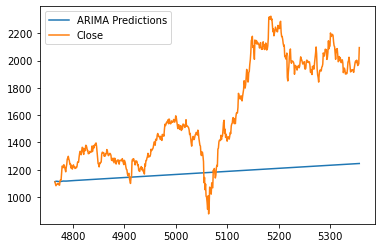

In [103]:
pred.plot(legend=True)
test_data['Close'].plot(legend=True)

In [104]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_data['Close'].mean()
rmse=sqrt(mean_squared_error(pred,test_data['Close']))
print(rmse)

543.7895697811986
